# Verification EDFA-Model in comm-toolbox

To understand if the EDFA-Model in the comm-toolbox is working as expected, we have to verify the behavior of this model

In [1]:
import numpy as np 
import scipy.signal as ssignal 
import scipy.constants as const
import matplotlib.pyplot as plt 
import comm as comm
from scipy.signal import welch

power of input signal [W] // [dBm] :   0.000501 // -3.0
power of output signal [W] // [dBm] :   0.001491 // 1.7356597839106342


/Users/knister/Documents/HTW/Software/env-comm-dispy/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/knister/Documents/HTW/Software/env-comm-dispy/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:1814: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/Users/knister/Documents/HTW/Software/env-comm-dispy/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:1814: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


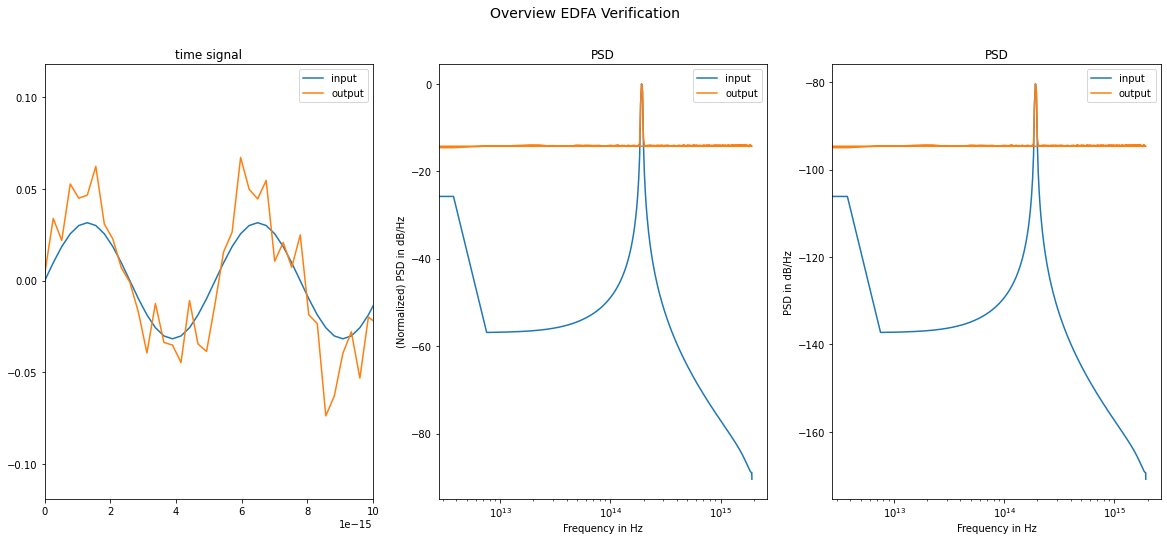

In [12]:
wl = 1556e-9
pow_cw_in_dBm = -3

f_cw_sig = const.c/wl 
sr = np.ceil(f_cw_sig*20)
t = np.arange(0,1e-10,1/sr)
cw_sig = np.sin(2*np.pi*f_cw_sig*t)
sig_pow = np.mean(abs(cw_sig)**2)
target_pow = 10**((pow_cw_in_dBm-30)/10)
cw_sig = cw_sig * np.sqrt((target_pow / sig_pow))

print("power of input signal [W] // [dBm] :   " + str(np.around(np.mean(abs(cw_sig)**2),6)) + " // " + str(10*np.log10(np.mean(abs(cw_sig)**2)/1) + 30))

cw_sig_noisy = comm.utils.add_edfa_noise(cw_sig, sr, opt_mid_wl=1550e-9, mode="APC", opt_target=0, opt_noise_figure=3, seed=None)

print("power of output signal [W] // [dBm] :   " + str(np.around(np.mean(abs(cw_sig_noisy)**2),6)) + " // " + str(10*np.log10(np.mean(abs(cw_sig_noisy)**2)/1) + 30))

fig, ax = plt.subplots(1, 3, figsize=(20,8))
fig.suptitle("Overview EDFA Verification", fontsize=14)
ax[0].set_title("time signal")
ax[0].plot(t,cw_sig, label="input")
ax[0].plot(t,cw_sig_noisy, label="output")
ax[0].legend()
ax[0].set_xlim(0,1e-14)

freqs_nperseg, psd_nperseg = welch(cw_sig, fs=sr, nperseg=1024, scaling="density")
freqs_nperseg_out, psd_nperseg_out = welch(cw_sig_noisy, fs=sr, nperseg=1024, scaling="density")
ax[1].set_title("PSD")
ax[1].set_ylabel("(Normalized) PSD in dB/Hz")
ax[1].set_xlabel("Frequency in Hz")
ax[1].plot(freqs_nperseg, 10*np.log10(np.sqrt(psd_nperseg/max(psd_nperseg))), label="input")
ax[1].plot(freqs_nperseg_out, 10*np.log10(np.sqrt(psd_nperseg_out/max(psd_nperseg_out))), label="output")
ax[1].set_xscale("log")
ax[1].legend()

freqs_nperseg, psd_nperseg = welch(cw_sig, fs=sr, nperseg=1024, scaling="density")
freqs_nperseg_out, psd_nperseg_out = welch(cw_sig_noisy, fs=sr, nperseg=1024, scaling="density")
ax[2].set_title("PSD")
ax[2].set_ylabel("PSD in dB/Hz")
ax[2].set_xlabel("Frequency in Hz")
ax[2].plot(freqs_nperseg, 10*np.log10(np.sqrt(psd_nperseg)), label="input")
ax[2].plot(freqs_nperseg_out, 10*np.log10(np.sqrt(psd_nperseg_out)), label="output")
ax[2].set_xscale("log")
ax[2].legend()

## Conclusion

What we can see here, is that the model is working as expected. The behavior of the EDFA model with respect to the set optical output power is interesting here. We can see from the calculations that this is significantly higher in real terms than indicated by the function settings. This is due to a simple EDFA model. Even if this is not physically correct, it is sufficient for our purposes.